# **DRIVE ACCESS AUTHENTICATION**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORTING PACKAGES**

In [3]:
import numpy as np
import pandas as pd

# **READING THE DATASET**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/TRF/HRDataset_v14.csv')

# **DATA PREPROCESSING**

In [5]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


**DATA CLEANING AND REMOVING THE NULL VALUES**

In [6]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [7]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [8]:
len(df.index)

311

In [9]:
df['DateofTermination'].count()

104

In [10]:
df['ManagerID'].count()

303

In [11]:
df.drop(labels = {'Employee_Name','EmpID','Position','State','DOB','DateofHire','Department','ManagerName','ManagerID','RecruitmentSource','LastPerformanceReview_Date'} , axis = 1 , inplace = True)

In [12]:
df.drop(labels = {'DateofTermination'} , axis = 1 , inplace = True)

In [13]:
df

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,0,0,1,1,5,4,0,62506,0,19,1960,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Exceeds,4.60,5,0,0,1
1,1,1,1,5,3,3,0,104437,1,27,2148,M,Married,US Citizen,No,White,career change,Voluntarily Terminated,Fully Meets,4.96,3,6,0,17
2,1,1,0,5,5,3,0,64955,1,20,1810,F,Married,US Citizen,No,White,hours,Voluntarily Terminated,Fully Meets,3.02,3,0,0,3
3,1,1,0,1,5,3,0,64991,0,19,1886,F,Married,US Citizen,No,White,N/A-StillEmployed,Active,Fully Meets,4.84,5,0,0,15
4,0,2,0,5,5,3,0,50825,1,19,2169,F,Divorced,US Citizen,No,White,return to school,Voluntarily Terminated,Fully Meets,5.00,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,1,1,5,3,0,65893,0,20,1810,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Fully Meets,4.07,4,0,0,13
307,0,0,0,5,5,1,0,48513,1,19,2458,F,Single,US Citizen,No,Asian,Another position,Voluntarily Terminated,PIP,3.20,2,0,5,4
308,0,0,0,1,3,4,0,220450,0,6,2067,F,Single,US Citizen,No,White,N/A-StillEmployed,Active,Exceeds,4.60,5,6,0,16
309,0,0,0,1,3,3,0,89292,0,9,2148,F,Single,US Citizen,No,White,N/A-StillEmployed,Active,Fully Meets,5.00,3,5,0,11


In [14]:
df.isnull().sum()

MarriedID                 0
MaritalStatusID           0
GenderID                  0
EmpStatusID               0
DeptID                    0
PerfScoreID               0
FromDiversityJobFairID    0
Salary                    0
Termd                     0
PositionID                0
Zip                       0
Sex                       0
MaritalDesc               0
CitizenDesc               0
HispanicLatino            0
RaceDesc                  0
TermReason                0
EmploymentStatus          0
PerformanceScore          0
EngagementSurvey          0
EmpSatisfaction           0
SpecialProjectsCount      0
DaysLateLast30            0
Absences                  0
dtype: int64

In [15]:
df.isnull().sum()

MarriedID                 0
MaritalStatusID           0
GenderID                  0
EmpStatusID               0
DeptID                    0
PerfScoreID               0
FromDiversityJobFairID    0
Salary                    0
Termd                     0
PositionID                0
Zip                       0
Sex                       0
MaritalDesc               0
CitizenDesc               0
HispanicLatino            0
RaceDesc                  0
TermReason                0
EmploymentStatus          0
PerformanceScore          0
EngagementSurvey          0
EmpSatisfaction           0
SpecialProjectsCount      0
DaysLateLast30            0
Absences                  0
dtype: int64

In [16]:
# copy for visualization
df_visualization = df.copy()

**NORMAILZATION OF THE REQUIRED COLUMNS**

In [17]:
df

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,0,0,1,1,5,4,0,62506,0,19,1960,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Exceeds,4.60,5,0,0,1
1,1,1,1,5,3,3,0,104437,1,27,2148,M,Married,US Citizen,No,White,career change,Voluntarily Terminated,Fully Meets,4.96,3,6,0,17
2,1,1,0,5,5,3,0,64955,1,20,1810,F,Married,US Citizen,No,White,hours,Voluntarily Terminated,Fully Meets,3.02,3,0,0,3
3,1,1,0,1,5,3,0,64991,0,19,1886,F,Married,US Citizen,No,White,N/A-StillEmployed,Active,Fully Meets,4.84,5,0,0,15
4,0,2,0,5,5,3,0,50825,1,19,2169,F,Divorced,US Citizen,No,White,return to school,Voluntarily Terminated,Fully Meets,5.00,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,1,1,5,3,0,65893,0,20,1810,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Fully Meets,4.07,4,0,0,13
307,0,0,0,5,5,1,0,48513,1,19,2458,F,Single,US Citizen,No,Asian,Another position,Voluntarily Terminated,PIP,3.20,2,0,5,4
308,0,0,0,1,3,4,0,220450,0,6,2067,F,Single,US Citizen,No,White,N/A-StillEmployed,Active,Exceeds,4.60,5,6,0,16
309,0,0,0,1,3,3,0,89292,0,9,2148,F,Single,US Citizen,No,White,N/A-StillEmployed,Active,Fully Meets,5.00,3,5,0,11


In [18]:
cols_to_normalize = ['Salary','MaritalStatusID','EmpStatusID','DeptID','PerfScoreID','PositionID','Zip','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences']

# Find the maximum and minimum values
max = []
min = []

# loop for getting the max and min of each column 
for i in cols_to_normalize : 
  max.append(df[i].max())

for i in cols_to_normalize:
  min.append(df[i].min())

print("max = ",max,"min = ",min)

k = 0 

# loop for normalizing the column values 
for i in cols_to_normalize : 
  df[i] = (df[i] - min[k])/(max[k] - min[k])
  k = k + 1 

max =  [250000, 4, 5, 6, 4, 30, 98052, 5.0, 5, 8, 6, 20] min =  [45046, 0, 1, 1, 1, 1, 1013, 1.12, 1, 0, 0, 1]


In [19]:
df.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,0,0.00,1,0.0,0.8,1.000000,0,0.085190,0,0.620690,0.009759,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Exceeds,0.896907,1.00,0.00,0.0,0.000000
1,1,0.25,1,1.0,0.4,0.666667,0,0.289777,1,0.896552,0.011696,M,Married,US Citizen,No,White,career change,Voluntarily Terminated,Fully Meets,0.989691,0.50,0.75,0.0,0.842105
2,1,0.25,0,1.0,0.8,0.666667,0,0.097139,1,0.655172,0.008213,F,Married,US Citizen,No,White,hours,Voluntarily Terminated,Fully Meets,0.489691,0.50,0.00,0.0,0.105263
3,1,0.25,0,0.0,0.8,0.666667,0,0.097315,0,0.620690,0.008996,F,Married,US Citizen,No,White,N/A-StillEmployed,Active,Fully Meets,0.958763,1.00,0.00,0.0,0.736842
4,0,0.50,0,1.0,0.8,0.666667,0,0.028197,1,0.620690,0.011913,F,Divorced,US Citizen,No,White,return to school,Voluntarily Terminated,Fully Meets,1.000000,0.75,0.00,0.0,0.052632


**SPLITING OF THE DATA**

In [20]:
# the copy of the dataframe
df_model = df.copy()

**ENCODING**

In [21]:
# Implement Sklearn label encoding on df
from sklearn import preprocessing

In [22]:
Lable_Encoder = preprocessing.LabelEncoder()

In [23]:
df_model['Sex'] = Lable_Encoder.fit_transform(df_model['Sex'])

In [24]:
df_model['MaritalDesc'] = Lable_Encoder.fit_transform(df_model['MaritalDesc'])

In [25]:
df_model['CitizenDesc'] = Lable_Encoder.fit_transform(df_model['CitizenDesc'])

In [26]:
df_model['HispanicLatino'] = Lable_Encoder.fit_transform(df_model['HispanicLatino'])

In [27]:
df_model['RaceDesc'] = Lable_Encoder.fit_transform(df_model['RaceDesc'])

In [28]:
df_model['TermReason'] = Lable_Encoder.fit_transform(df_model['TermReason'])

In [29]:
df_model['EmploymentStatus'] = Lable_Encoder.fit_transform(df_model['EmploymentStatus'])

In [30]:
df_model['PerformanceScore'] = Lable_Encoder.fit_transform(df_model['PerformanceScore'])

In [31]:
df_model

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,0,0.00,1,0.0,0.8,1.000000,0,0.085190,0,0.620690,0.009759,1,3,2,0,5,3,0,0,0.896907,1.00,0.000,0.000000,0.000000
1,1,0.25,1,1.0,0.4,0.666667,0,0.289777,1,0.896552,0.011696,1,1,2,0,5,5,2,1,0.989691,0.50,0.750,0.000000,0.842105
2,1,0.25,0,1.0,0.8,0.666667,0,0.097139,1,0.655172,0.008213,0,1,2,0,5,7,2,1,0.489691,0.50,0.000,0.000000,0.105263
3,1,0.25,0,0.0,0.8,0.666667,0,0.097315,0,0.620690,0.008996,0,1,2,0,5,3,0,1,0.958763,1.00,0.000,0.000000,0.736842
4,0,0.50,0,1.0,0.8,0.666667,0,0.028197,1,0.620690,0.011913,0,0,2,0,5,16,2,1,1.000000,0.75,0.000,0.000000,0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0.00,1,0.0,0.8,0.666667,0,0.101716,0,0.655172,0.008213,1,3,2,0,5,3,0,1,0.760309,0.75,0.000,0.000000,0.631579
307,0,0.00,0,1.0,0.8,0.000000,0,0.016916,1,0.620690,0.014891,0,3,2,0,1,0,2,3,0.536082,0.25,0.000,0.833333,0.157895
308,0,0.00,0,0.0,0.4,1.000000,0,0.855821,0,0.172414,0.010862,0,3,2,0,5,3,0,0,0.896907,1.00,0.750,0.000000,0.789474
309,0,0.00,0,0.0,0.4,0.666667,0,0.215883,0,0.275862,0.011696,0,3,2,0,5,3,0,1,1.000000,0.50,0.625,0.000000,0.526316


In [32]:
df_model.corr().head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
MarriedID,1.000000,0.164044,-0.024199,0.085619,-0.119932,-0.058362,-0.012708,0.026165,0.077028,-0.027334,-0.041147,-0.024199,-0.638592,-0.046692,-0.052735,0.029099,0.008115,0.076601,0.058362,-0.091178,-0.126191,0.061278,0.002875,0.096086
MaritalStatusID,0.164044,1.000000,-0.030236,0.114630,0.012768,0.044693,0.041117,-0.070291,0.099367,0.021923,0.010620,-0.030236,-0.460629,0.005890,-0.108620,-0.061421,0.055300,0.112176,-0.044693,0.033249,0.002068,-0.051093,-0.096500,0.018722
GenderID,-0.024199,-0.030236,1.000000,-0.032440,-0.038838,-0.054915,0.031493,0.056097,-0.015741,-0.081612,0.048539,1.000000,0.019533,-0.013754,0.020948,0.031101,0.008426,-0.016979,0.054915,-0.036276,-0.044603,0.087073,0.080329,-0.004577
EmpStatusID,0.085619,0.114630,-0.032440,1.000000,0.088711,-0.071208,0.189025,-0.110912,0.948058,0.221221,-0.150527,-0.032440,-0.159212,-0.058570,-0.049908,-0.020552,0.594521,0.959279,0.071208,0.024305,0.010553,-0.166560,0.078318,0.091834
DeptID,-0.119932,0.012768,-0.038838,0.088711,1.000000,-0.084811,-0.129998,-0.448132,0.065922,0.030294,0.290023,-0.038838,0.090461,0.015695,-0.082626,0.060420,0.057626,0.085298,0.084811,-0.094940,0.031997,-0.785101,0.124630,0.053308


**DATA VISUALIZATION**

In [33]:
import matplotlib.pyplot as plt

In [34]:
df1 = df_visualization['Salary'].describe()
fig = plt.figure(figsize =(10,7))

<Figure size 720x504 with 0 Axes>

{'boxes': [<matplotlib.lines.Line2D at 0x7f2392438990>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2392416dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f239239ee10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f239239e8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2392416350>,
  <matplotlib.lines.Line2D at 0x7f2392416890>]}

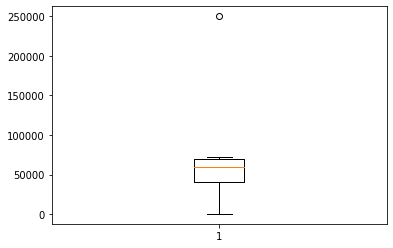

In [35]:
plt.boxplot(df1)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2391ee3690>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2391ee8710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2391ef0750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2391ef0210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2391ee3c50>,
  <matplotlib.lines.Line2D at 0x7f2391ee81d0>]}

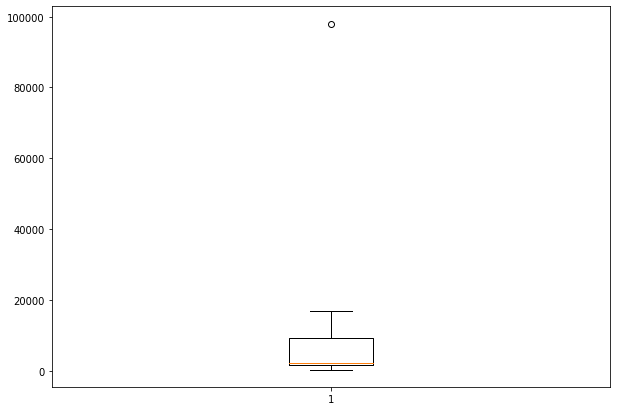

In [36]:
df2 = df_visualization['Zip'].describe()
fig = plt.figure(figsize =(10,7))
plt.boxplot(df2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2391e55590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2391e5a610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2391e62650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2391e62110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2391e55b50>,
  <matplotlib.lines.Line2D at 0x7f2391e5a0d0>]}

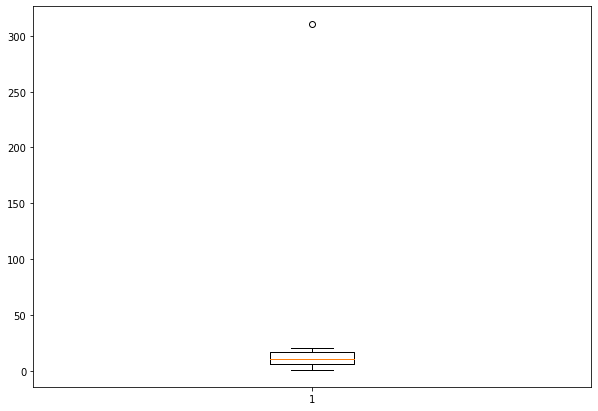

In [37]:
df3 = df_visualization['Absences'].describe()
fig = plt.figure(figsize =(10,7))
plt.boxplot(df3)

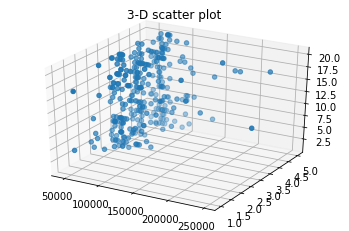

In [38]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
x = df_visualization['Salary']
y = df_visualization['EmpSatisfaction']
z = df_visualization['Absences'] 

ax.scatter(x,y,z)
ax.set_title('3-D scatter plot')
plt.show()

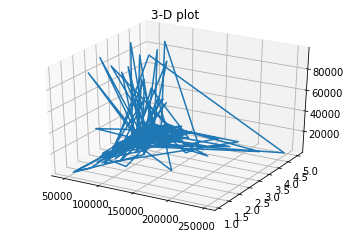

In [39]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
x = df_visualization['Salary']
y = df_visualization['EngagementSurvey']
z = df_visualization['Zip'] 

ax.plot3D(x,y,z)
ax.set_title('3-D plot')
plt.show()

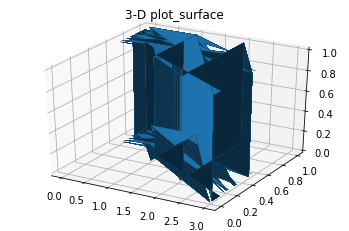

In [40]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
x = df_model['PerformanceScore']
y = df_model['EngagementSurvey']
z = df_model[['Sex']] 

ax.plot_surface(x,y,z)
ax.set_title('3-D plot_surface')
plt.show()

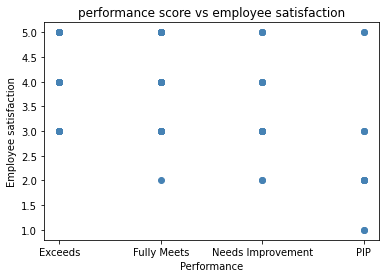

In [41]:
# scatterplot between performance score and  EmpSatisfaction	
plt.scatter((df_visualization['PerformanceScore']) , df_visualization['EmpSatisfaction'], c = ['steelblue'])
plt.xlabel("Performance")
plt.ylabel("Employee satisfaction")
plt.title("performance score vs employee satisfaction")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


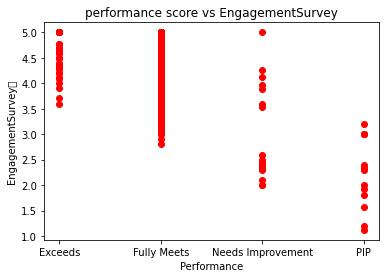

In [42]:
# scatterplot between performance score and  EngagementSurvey	
plt.scatter((df_visualization['PerformanceScore']) , df_visualization['EngagementSurvey'], c = ['Red'])
plt.xlabel("Performance")
plt.ylabel("EngagementSurvey	")
plt.title("performance score vs EngagementSurvey")
plt.show()

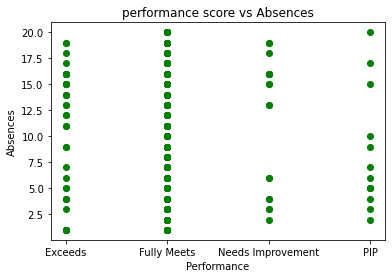

In [43]:
# scatterplot between performance score and  Absences	
plt.scatter((df_visualization['PerformanceScore']) , df_visualization['Absences'], c = ['Green'])
plt.xlabel("Performance")
plt.ylabel("Absences")
plt.title("performance score vs Absences")
plt.show()

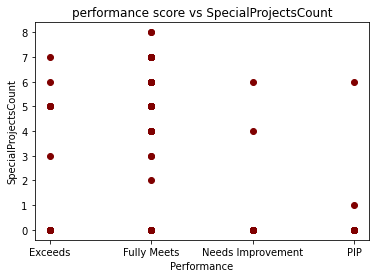

In [44]:
# scatterplot between performance score and  SpecialProjectsCount	
plt.scatter((df_visualization['PerformanceScore']) , df_visualization['SpecialProjectsCount'], c = ['Maroon'])
plt.xlabel("Performance")
plt.ylabel("SpecialProjectsCount")
plt.title("performance score vs SpecialProjectsCount")
plt.show()

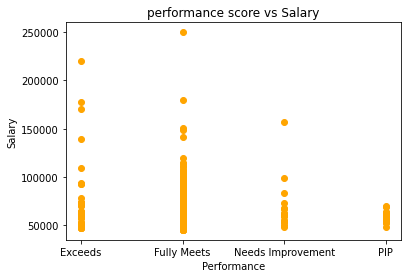

In [45]:
# scatterplot between performance score and  	Salary
plt.scatter((df_visualization['PerformanceScore']) , df_visualization['Salary'], c = ['Orange'])
plt.xlabel("Performance")
plt.ylabel("Salary")
plt.title("performance score vs Salary")
plt.show()

# **MODEL IMPLEMENTATION**

**TRAIN TEST SPLIT**

In [46]:
from sklearn import model_selection

In [47]:
# separates target variable from the rest of the features 
X = df_model.drop('PerformanceScore' , axis = 1) 
Y = df_model['PerformanceScore']

In [48]:
X

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,0,0.00,1,0.0,0.8,1.000000,0,0.085190,0,0.620690,0.009759,1,3,2,0,5,3,0,0.896907,1.00,0.000,0.000000,0.000000
1,1,0.25,1,1.0,0.4,0.666667,0,0.289777,1,0.896552,0.011696,1,1,2,0,5,5,2,0.989691,0.50,0.750,0.000000,0.842105
2,1,0.25,0,1.0,0.8,0.666667,0,0.097139,1,0.655172,0.008213,0,1,2,0,5,7,2,0.489691,0.50,0.000,0.000000,0.105263
3,1,0.25,0,0.0,0.8,0.666667,0,0.097315,0,0.620690,0.008996,0,1,2,0,5,3,0,0.958763,1.00,0.000,0.000000,0.736842
4,0,0.50,0,1.0,0.8,0.666667,0,0.028197,1,0.620690,0.011913,0,0,2,0,5,16,2,1.000000,0.75,0.000,0.000000,0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0.00,1,0.0,0.8,0.666667,0,0.101716,0,0.655172,0.008213,1,3,2,0,5,3,0,0.760309,0.75,0.000,0.000000,0.631579
307,0,0.00,0,1.0,0.8,0.000000,0,0.016916,1,0.620690,0.014891,0,3,2,0,1,0,2,0.536082,0.25,0.000,0.833333,0.157895
308,0,0.00,0,0.0,0.4,1.000000,0,0.855821,0,0.172414,0.010862,0,3,2,0,5,3,0,0.896907,1.00,0.750,0.000000,0.789474
309,0,0.00,0,0.0,0.4,0.666667,0,0.215883,0,0.275862,0.011696,0,3,2,0,5,3,0,1.000000,0.50,0.625,0.000000,0.526316


In [49]:
Y

0      0
1      1
2      1
3      1
4      1
      ..
306    1
307    3
308    0
309    1
310    1
Name: PerformanceScore, Length: 311, dtype: int64

In [50]:
# For training the model we divide the data into training data and testing data
# for that we use train_test_split function

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify=Y )

In [51]:
X_train.shape

(217, 23)

In [52]:
Y_train.shape

(217,)

In [53]:
X_test.shape

(94, 23)

In [54]:
Y_test.shape

(94,)

**Feature scaling**

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**USING THE LINEAR REGRESSION TO TRAIN THE MODEL**

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [57]:
df_model_regression = LinearRegression(fit_intercept = True).fit(X_train, Y_train)

In [58]:
df_model_regression.coef_

array([ 1.66902404e-02,  7.50449402e-03,  3.54431332e-03, -1.71028711e-01,
        1.33136169e-02, -5.47293085e-01,  1.88991253e-03, -4.84253710e-03,
        1.83516586e-01, -2.04967494e-02, -1.49861040e-02,  3.54431332e-03,
       -5.85545350e-04,  4.99270623e-03, -8.02452234e-04, -1.22113159e-03,
       -1.42260322e-02, -8.50210103e-05, -2.09664762e-02,  1.72402835e-02,
        1.57876604e-03,  1.93518852e-02, -1.41651467e-02])

In [59]:
# for training dataset
print("Score of the training dataset is ----->",df_model_regression.score(X_train, Y_train))

Score of the training dataset is -----> 0.9639817018710427


In [60]:
# for testing dataset
print("Score of the testing dataset is ----->",df_model_regression.score(X_test, Y_test))

Score of the testing dataset is -----> 0.854992242934876


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [65]:
model_1 = LinearRegression()
model_2 = RandomForestRegressor()

In [67]:
model_1.fit(X_train, Y_train)
model_2.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)

In [69]:
pred_final = (pred_1+pred_2)/2.0

In [73]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [71]:
print(mean_squared_error(Y_test, pred_final))

0.04088476927290222


 **MAKING THE CONFUSION MATRIX**

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

# **DEEP LEARNING MODEL**

**ARTIFICIAL NEURAL NETWORK**

In [76]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [77]:
df_model_dense = Sequential()

In [78]:
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu', input_dim = 23))

In [79]:
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu'))
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu'))
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu'))
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu'))
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu'))
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu'))
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu'))
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu'))
df_model_dense.add(Dense(units = 12, kernel_initializer= 'uniform', activation = 'relu'))

In [80]:
df_model_dense.add(Dense(units = 1, kernel_initializer= 'uniform', activation = 'softmax'))

In [81]:
df_model_dense.compile(optimizer = 'adam', loss = "MSE", metrics = ['accuracy'])

In [82]:
print("For Training ----------------------------->")
df_model_dense.fit(X_train, Y_train, batch_size = 5, epochs = 20)

For Training ----------------------------->
Epoch 1/20
44/44 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.7788
Epoch 2/20
44/44 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.7788
Epoch 3/20
44/44 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.7788
Epoch 4/20
44/44 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.7788
Epoch 5/20
44/44 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.7788
Epoch 6/20
44/44 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.7788
Epoch 7/20
44/44 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.7788
Epoch 8/20
44/44 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.7788
Epoch 9/20
44/44 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.7788
Epoch 10/20
44/44 [==============================] - 0s 2ms/step - loss: 0

In [83]:
print("For Testing ----------------------------->")
df_model_dense.fit(X_test, Y_test, batch_size = 5, epochs = 20)

For Testing ----------------------------->
Epoch 1/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.7872
Epoch 2/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.7872
Epoch 3/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.7872
Epoch 4/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.7872
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.7872
Epoch 6/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.7872
Epoch 7/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3404 - accuracy: 0.7872
Epoch 8/20
19/19 [==============================] - 0s 4ms/step - loss: 0.3404 - accuracy: 0.7872
Epoch 9/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.7872
Epoch 10/20
19/19 [==============================] - 0s 2ms/step - loss: 0.

In [84]:
Y_pred = df_model_dense.predict(X_test)

In [ ]:
print(Y_pred)

In [86]:
df_model_dense_confuse = confusion_matrix(Y_test,Y_pred)
print(df_model_dense_confuse)
accuracy_score(Y_test,Y_pred)

[[ 0 11  0  0]
 [ 0 74  0  0]
 [ 0  5  0  0]
 [ 0  4  0  0]]


0.7872340425531915